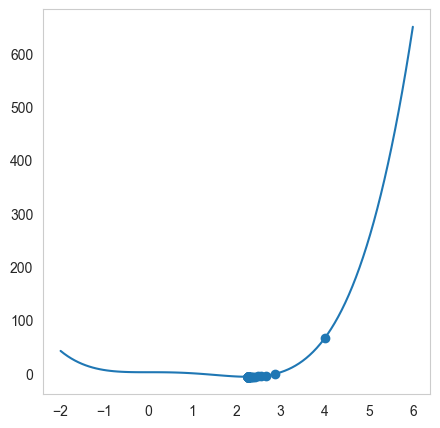

In [12]:
# 과제 001
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.layers.core import activation

def f(x):
    return x**4 - 3*x**3 +2

def f_prime(x):
  h = 0.001
  return (f(x+h)-f(x)) / h

def fprime2(x):
    return 4*x**3 - 9*x**2

all_x = tf.linspace(-2,6,100)
all_y = f(all_x)

# 초깃값
x = tf.Variable(4.)
# Learning rate
LR = 0.01

x_history, y_history = [], []
for _ in range(100):
  y = f(x)
  step = LR*f_prime(x)

  x_history.append(x.numpy())
  y_history.append(y.numpy())

  x.assign_sub(step)  # x = x - lr*dx

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(all_x, all_y)
ax.scatter(x_history, y_history)
plt.grid()
plt.show()

In [1]:
# 과제 002

train_X.shape train_Y.shape (404, 13) (404,)


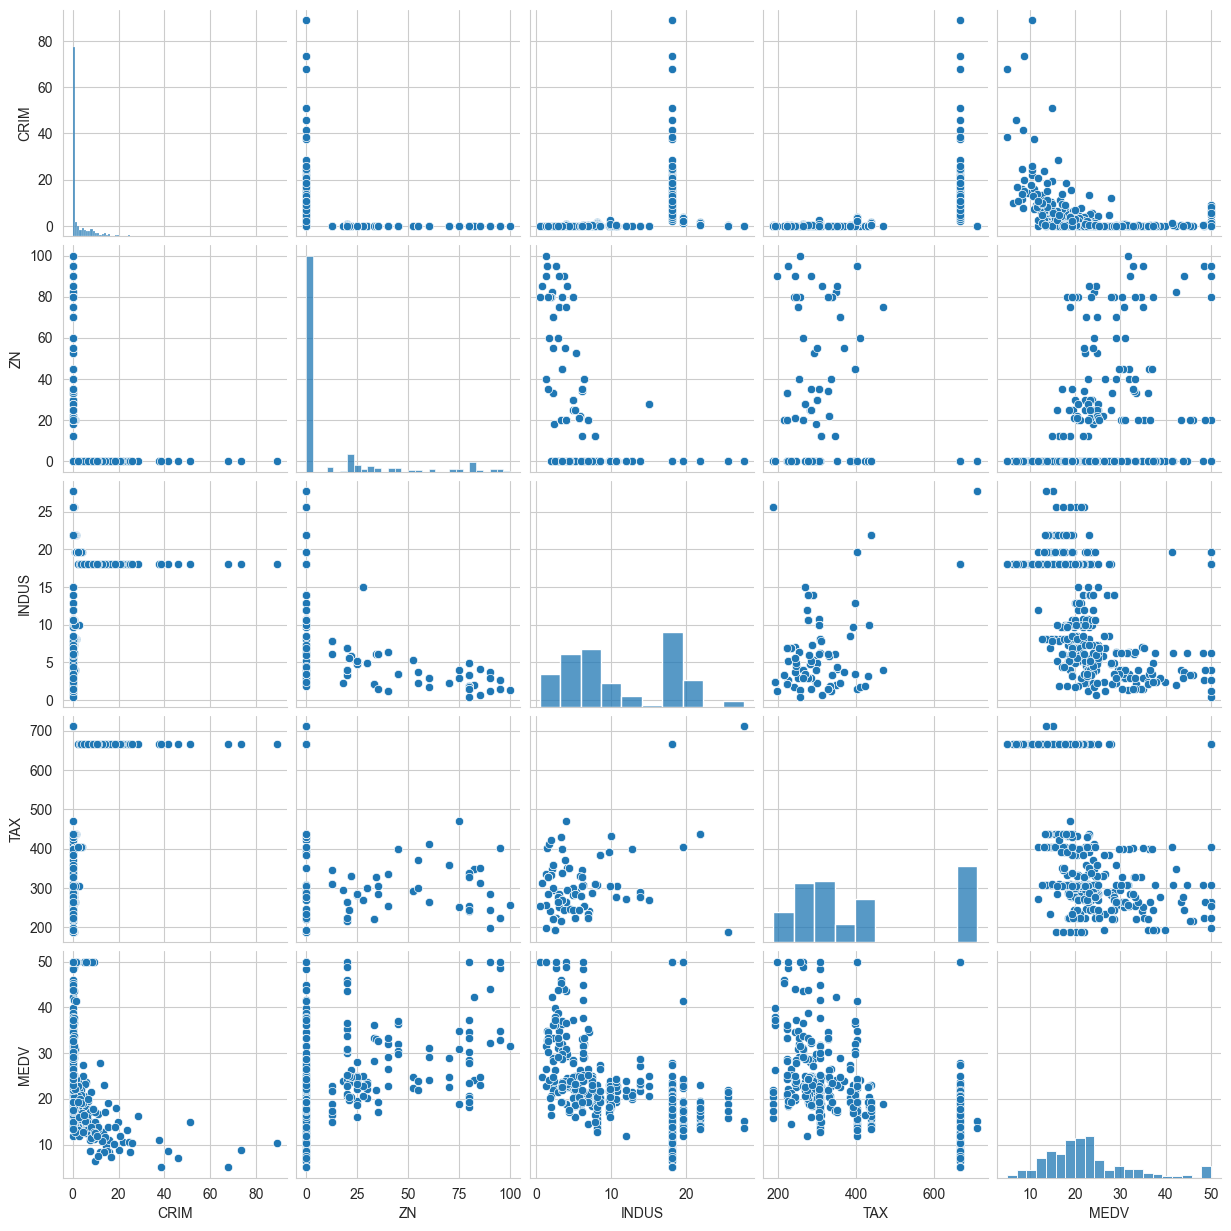

In [2]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=113)
print('train_X.shape', 'train_Y.shape', train_X.shape, train_Y.shape)

all_train_data = np.hstack((train_X, train_Y.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()
# , diag_kind='kde' 이부분이 어쩐지 파이참에서 안먹음
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='auto')
plt.show()

In [3]:
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [4]:
model = tf.keras.Sequential([
    # 뉴런이 52개, 행이 13개
    # input_shape=(행, 렬, 채널 수)
    # 그게 연속적으로
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
# 컴파일 할 거다. 옵티마이저는 Adam 쓸 건데 learning rate는 0.07로, 그 오차는 mean squared error로 재 달라.
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
model.summary()
'''
52*14 = 728,
39*53 = 2067
'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 52)                728       
                                                                 
 dense_1 (Dense)             (None, 39)                2067      
                                                                 
 dense_2 (Dense)             (None, 1)                 40        
                                                                 
Total params: 2,835
Trainable params: 2,835
Non-trainable params: 0
_________________________________________________________________


C:\Users\user\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


'\n52*14 = 728,\n39*53 = 2067\n'

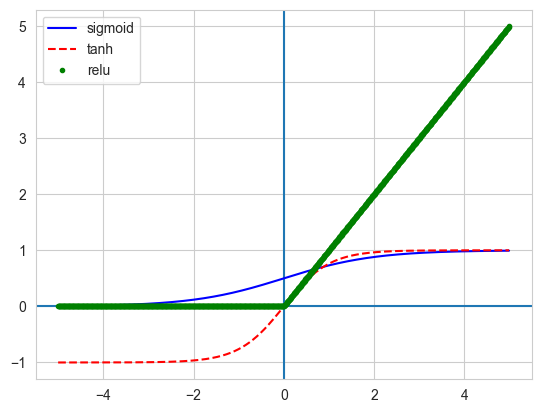

In [5]:
import math
def sigmoid(x):
    return (1 / (1 + math.exp(-x)))

x = np.arange(-5, 5, 0.01)
# 이 배열을 sigmoid해서 넣어라.
# z가 0이면 0으로 만들어 달라.
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

relu = [0 if z < 0 else z for z in x]

plt.axhline(0)
plt.axvline(0)
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [6]:
# 여기서부터 잘 모르겠음
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 11ms/step - loss: 3.3269 - val_loss: 0.7919
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.5101 - val_loss: 0.5651
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2631 - val_loss: 0.5608
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2765 - val_loss: 0.3582
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2057 - val_loss: 0.3270
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1788 - val_loss: 0.2977
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1353 - val_loss: 0.2406
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1292 - val_loss: 0.2059
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1097 - val_loss: 0.2248
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1095 - val_loss: 0.2111
Epoch 11/25
10/10 

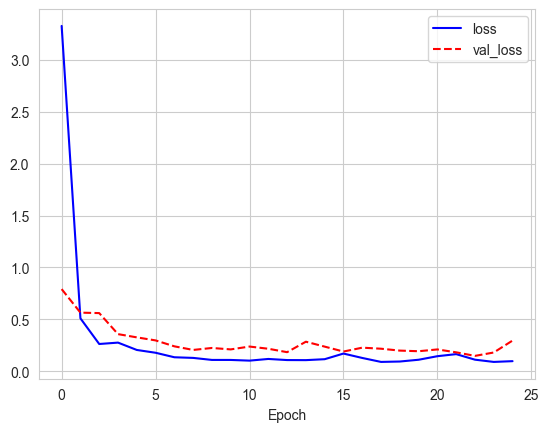

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [8]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.3136


0.3136172890663147

4/4 [==============================] - 0s 1ms/step


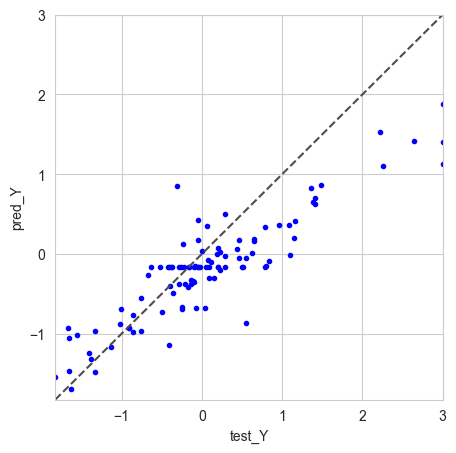

In [9]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()